In [114]:
# 录制时间2019-06-14到2019-08-23
# 共 67 part
# 学习时间2019-09-20开始
# 謝承熹

02.Monte-Carlo to simulate the price of call option

In [9]:
#Monte-Carlo to simulate the price of call option
import numpy as np
import math

In [10]:
S0 = 100
K = 105
T = 1.0
r = 0.05
sigma = 0.2

In [11]:
I = 100000 #进行十万次模拟

In [12]:
np.random.seed(1000)

In [13]:
z = np.random.standard_normal(I)

In [14]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)

In [15]:
ST

array([ 87.73128167, 109.8764437 , 102.52161044, ..., 155.44578614,
        96.73039856,  99.13849486])

In [31]:
hT = np.maximum(ST - K,0)
C0 = math.exp( -r * T) * np.mean(hT)
print('value of the European call option: {0:5.3f}.'.format(C0))

value of the European call option: 8.019.


03.historical vol

In [32]:
#historical vol
import numpy as np
import pandas as pd
from pylab import plt,mpl

In [35]:
plt.style.use('seaborn')
#sans-serif,serif
mpl.rcParams['font.family'] = 'serif'

In [71]:
data = pd.read_csv('data/tr_eikon_eod_data.csv',index_col=0,parse_dates=True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [72]:
#data = data[['.SPX']].dropna(inplace=True)
data = data[['.SPX']].dropna()
data.head()

,.SPX
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
.SPX    2138 non-null float64
dtypes: float64(1)
memory usage: 33.4 KB


In [75]:
data.pct_change().head()

,.SPX
Date,
2010-01-04,NaN
2010-01-05,0.003116
2010-01-06,0.000546
2010-01-07,0.004001
2010-01-08,0.002882


In [77]:
#log retern
data['rets'] = np.log(data/data.shift(1))
data.head()

,.SPX,rets
Date,,
2010-01-04,1132.99,NaN
2010-01-05,1136.52,0.003111
2010-01-06,1137.14,0.000545
2010-01-07,1141.69,0.003993
2010-01-08,1144.98,0.002878


In [86]:
#calculate daily vol to yearly vol
data['vola'] = data['rets'].rolling(252,min_periods=30).std() * np.sqrt(252)
data.head()

,.SPX,rets,vola
Date,,,
2010-01-04,1132.99,NaN,NaN
2010-01-05,1136.52,0.003111,NaN
2010-01-06,1137.14,0.000545,NaN
2010-01-07,1141.69,0.003993,NaN
2010-01-08,1144.98,0.002878,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000193AD4E27F0>,
      dtype=object)

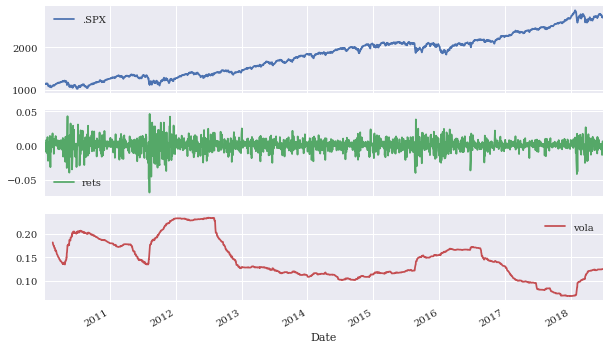

In [100]:
data.plot(subplots=True,figsize=(10,6))

04.idioms und paradigms

In [104]:
#numpy 向量化计算真的好快
import math
loops = 250000
a = range(1,loops)
def f(x):
    return 3 * math.log(x) + math.cos(x)**2

%timeit r = [f(x) for x in a]

191 ms ± 8.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [105]:
import numpy as np
a = np.arange(1,loops)
%timeit r = [f(x) for x in a]

266 ms ± 36.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [111]:
import numpy as np
a = np.arange(1,loops)
%timeit r = 3 * np.log(a) + np.cos(a)**2

12.5 ms ± 944 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [112]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) **2'
%timeit r = ne.evaluate(f)

4.36 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [114]:
import numexpr as ne
ne.set_num_threads(2)
f = '3 * log(a) + cos(a) **2'
%timeit r = ne.evaluate(f)

2.5 ms ± 80.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [118]:
import numexpr as ne
ne.set_num_threads(4)
f = '3 * log(a) + cos(a) **2'
%timeit r = ne.evaluate(f)

1.67 ms ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [120]:
import numexpr as ne
ne.set_num_threads(8)
f = '3 * log(a) + cos(a) **2'
%timeit r = ne.evaluate(f)

1.19 ms ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


05.AI Finance SVM

In [121]:
#AI-First Finance

In [122]:
import numpy as np
import pandas as pd

In [134]:
data = pd.read_csv('data/tr_eikon_eod_data.csv',index_col = 0,parse_dates=True)
data = data[['AAPL.O']]
data.dropna(inplace=True)
data.head()


,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


In [135]:
data['Return'] = np.log(data/data.shift(1))
data.head()

,AAPL.O,Return
Date,,
2010-01-04,30.572827,NaN
2010-01-05,30.625684,0.001727
2010-01-06,30.138541,-0.016034
2010-01-07,30.082827,-0.001850
2010-01-08,30.282827,0.006626


In [133]:
data.dropna(inplace=True)
data.head()

,AAPL.O,Return
Date,,
2010-01-05,30.625684,0.001727
2010-01-06,30.138541,-0.016034
2010-01-07,30.082827,-0.001850
2010-01-08,30.282827,0.006626
2010-01-11,30.015684,-0.008861


In [136]:
#try use 6 past days to predict the index of today
lags = 6

In [138]:
cols = []

for lag in range(1,lags+1):
    col = 'lag_{}'.format(lag)
    #np.sign:if the number is positiv,return +1,if the number is negative,return -1
    data[col] = np.sign(data['Return'].shift(lag))
    cols.append(col)
    
data.head(15)

G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sign
  


,AAPL.O,Return,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,0.001727,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,-0.016034,1.0,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,-0.001850,-1.0,1.0,NaN,NaN,NaN,NaN
2010-01-08,30.282827,0.006626,-1.0,-1.0,1.0,NaN,NaN,NaN
2010-01-11,30.015684,-0.008861,1.0,-1.0,-1.0,1.0,NaN,NaN
2010-01-12,29.674256,-0.011440,-1.0,1.0,-1.0,-1.0,1.0,NaN
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [142]:
data.dropna(inplace=True)
data.head()

,AAPL.O,Return,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-19,30.719969,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-20,30.246398,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [152]:
from sklearn.svm import SVC
model = SVC(gamma='scale')
model.fit(data[cols],np.sign(data['Return']))
data['Prediction'] = model.predict(data[cols])
data.head()

,AAPL.O,Return,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction
Date,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
2010-01-19,30.719969,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-01-20,30.246398,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0


In [153]:
#two minus equal plus,how much we earn or loss-----two positives or two negatives mean we win
data['Strategy'] = data['Prediction'] * data['Return']
data.head()

,AAPL.O,Return,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
Date,,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.014007
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.005808
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-0.016853
2010-01-19,30.719969,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.043288
2010-01-20,30.246398,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.015536


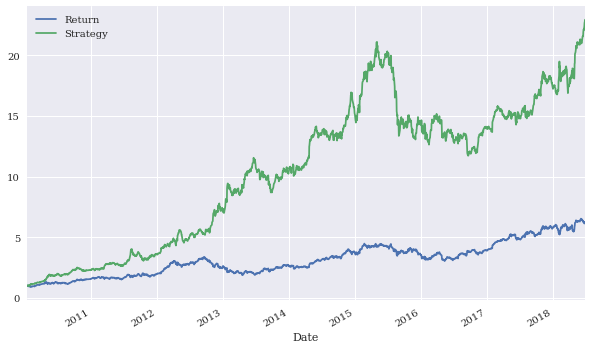

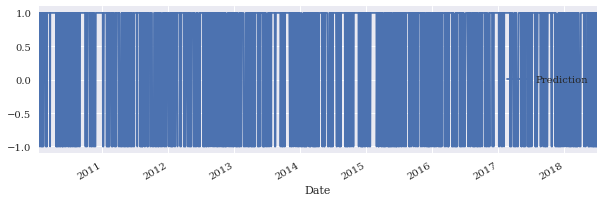

In [176]:
data[['Return','Strategy']].cumsum().apply(np.exp).plot(figsize=[10,6])
data[['Prediction']].plot(figsize=[10,3])

In [183]:
#order number ,um transaction cost zu vermeiden
data['Number'] = np.where(data.Prediction != data.Prediction.shift(1),1,0)
data.head()
data[['Number']].cumsum()

,Number
Date,
2010-01-13,1
2010-01-14,2
2010-01-15,3
2010-01-19,3
2010-01-20,4
2010-01-21,5
2010-01-22,5
2010-01-25,5
2010-01-26,6


6.Data Type and Structure

In [1]:
a = 10
type(a)

int

In [3]:
a.bit_length()

4

In [7]:
for a in range(1,17):
    print(a,a.bit_length())

1 1
2 2
3 2
4 3
5 3
6 3
7 3
8 4
9 4
10 4
11 4
12 4
13 4
14 4
15 4
16 5


In [9]:
a = 100000
print(a.bit_length())

17


In [10]:
import numpy as np
np.log(100000)/np.log(2)

16.609640474436812

In [16]:
googol = 10**100
print(googol)
print(googol.bit_length())
print(np.log(float(googol))/np.log(2))

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
333
332.19280948873626


In [17]:
b = 0.35
print(type(b))
print(b + 0.1)


<class 'float'>
0.44999999999999996


In [21]:
for i in range(17):
    x = i ** 0.5
    y = x ** 0.2
    print(i,i-y)

0 0.0
1 0.0
2 0.9282265374637069
3 1.8838768259660956
4 2.851301645002965
5 3.825381056911981
6 4.803768801148685
7 5.785185955960933
8 6.768855586655084
9 7.754269060384482
10 8.741074588205834
11 9.729018384789859
12 10.717911146013185
13 11.707607779219169
14 12.697994545682532
15 13.68898057696025
16 14.680492089227105


In [22]:
c = 0.5
#(分子，分母)
c.as_integer_ratio()

(1, 2)

In [23]:
b.as_integer_ratio()

(3152519739159347, 9007199254740992)

In [24]:
3152519739159347/9007199254740992

0.35

In [26]:
import decimal
from decimal import Decimal

In [27]:
decimal.getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [29]:
d = Decimal(1)/Decimal(11)
d

Decimal('0.09090909090909090909090909091')

In [37]:
decimal.getcontext().prec=4
e = Decimal(1)/Decimal(11)
e

Decimal('0.09091')

In [38]:
decimal.getcontext().prec=50
f = Decimal(1)/Decimal(11)
f

Decimal('0.090909090909090909090909090909090909090909090909091')

In [39]:
g = d + e + f
g

Decimal('0.27272818181818181818181818181818181818181818181818')

In [40]:
#Boolean
import keyword
keyword.kwlist

['False',
 'None',
 'True',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [6]:
#String
t = 'this is a string'
print(t.capitalize())
print(t.split())

This is a string
['this', 'is', 'a', 'string']


In [15]:
print(t.find('string'))
print(t.find('this'))
print(t.find('sting'))

10
0
-1


In [25]:
t.replace(' ','!')

'this!is!a!string'

In [26]:
t.replace(' ','')

'thisisastring'

In [23]:
t.replace('s','sd')

'thisd isd a sdtring'

In [29]:
'www.csi.com'.strip('w.')

'csi.com'

In [34]:
i = 0
while i < 4:
    print(i)
    i += 1

0
1
2
3


In [35]:
i = 0
while i < 4:
    print(i,end='|')
    i += 1

0|1|2|3|

In [36]:
i = 0
while i < 4:
    print(i,end='')
    i += 1

0123

In [48]:
print('this is a integer %d' %15)
print('this is a integer %4d' %15)
print('this is a integer %04d' %15)
print('this is a float %f' %15)
#a.b  a 栏宽，预设为6
print('this is a float %2f' %15)
print('this is a float %.2f' %15)
print('this is a float %f' %15.3546)
print('this is a float %2f' %15.3546)
print('this is a float %.2f' %15.3546)
print('this is a float %8.2f' %15.3546)
print('this is a float %-8.2f' %15.3546)
print('this is a float %08.2f' %15.3546)
print('this is a string %s' %'Python')
print('this is a string %10s' %'Python')
print('this is a string %-10s' %'Python')

this is a integer 15
this is a integer   15
this is a integer 0015
this is a float 15.000000
this is a float 15.000000
this is a float 15.00
this is a float 15.354600
this is a float 15.354600
this is a float 15.35
this is a float    15.35
this is a float 15.35   
this is a float 00015.35
this is a string Python
this is a string     Python
this is a string Python    


In [59]:
print('this is a interger {}'.format(15))
print('this is a interger {:d}'.format(15))
print('this is a interger {:4d}'.format(15))
print('this is a interger {:04d}'.format(15))
print('this is a interger {:f}'.format(15.3456))
print('this is a interger {:.2f}'.format(15.3456))
print('this is a interger {:8f}'.format(15.3456))
print('this is a interger {:8.2f}'.format(15.3456))
print('this is a interger {:<8.2f}'.format(15.3456))#向左对齐
print('this is a interger {:>8.2f}'.format(15.3456))#向右对齐

this is a interger 15
this is a interger 15
this is a interger   15
this is a interger 0015
this is a interger 15.345600
this is a interger 15.35
this is a interger 15.345600
this is a interger    15.35
this is a interger 15.35   
this is a interger    15.35


In [64]:
i = 0
while i < 4:
    print('the number is %d' % i)
    i  += 1
i = 0
while i < 4:
    print('the number is {:d}'.format(i))
    i  += 1

the number is 0
the number is 1
the number is 2
the number is 3
the number is 0
the number is 1
the number is 2
the number is 3


In [65]:
#Regular Expression
import re

In [103]:
series = """
'01/18/2014 13:00:00', 100, '1st':
'01/18/2014 13:30:00', 110, '2nd':
'01/18/2014 14:00:00', 120, '3rd'
"""

In [88]:
dt = re.compile('[0-9]+')#抓取所有数字，加号代表持续做做到不能做为止
result = dt.findall(series)
result

['01',
 '18',
 '2014',
 '13',
 '00',
 '00',
 '100',
 '1',
 '01',
 '18',
 '2014',
 '13',
 '30',
 '00',
 '110',
 '2',
 '01',
 '18',
 '2014',
 '14',
 '00',
 '00',
 '120',
 '3']

In [89]:
dt = re.compile('[0-9/]+')#抓取所有数字与斜线，加号代表持续做做到不能做为止
result = dt.findall(series)
result

['01/18/2014',
 '13',
 '00',
 '00',
 '100',
 '1',
 '01/18/2014',
 '13',
 '30',
 '00',
 '110',
 '2',
 '01/18/2014',
 '14',
 '00',
 '00',
 '120',
 '3']

In [90]:
dt = re.compile('[0-9/a-z]+')#抓取所有数字与斜线，包括字母，加号代表持续做做到不能做为止
result = dt.findall(series)
result

['01/18/2014',
 '13',
 '00',
 '00',
 '100',
 '1st',
 '01/18/2014',
 '13',
 '30',
 '00',
 '110',
 '2nd',
 '01/18/2014',
 '14',
 '00',
 '00',
 '120',
 '3rd']

In [91]:
dt = re.compile('[0-9/a-z:]+')#抓取所有数字与斜线，包括字母，包括冒号，加号代表持续做做到不能做为止
result = dt.findall(series)
result

['01/18/2014',
 '13:00:00',
 '100',
 '1st',
 ':',
 '01/18/2014',
 '13:30:00',
 '110',
 '2nd',
 ':',
 '01/18/2014',
 '14:00:00',
 '120',
 '3rd']

In [92]:
dt = re.compile('[0-9/a-z:\s]+')#\s代表逃脱字源space代表空格
result = dt.findall(series)
result

['\n',
 '01/18/2014 13:00:00',
 ' 100',
 '1st',
 ':\n',
 '01/18/2014 13:30:00',
 ' 110',
 '2nd',
 ':\n',
 '01/18/2014 14:00:00',
 ' 120',
 '3rd',
 '\n']

In [93]:
dt = re.compile("'[0-9/a-z:\s]+'")#\s代表逃脱字源space代表空格
result = dt.findall(series)
result

["'01/18/2014 13:00:00'",
 "'1st'",
 "'01/18/2014 13:30:00'",
 "'2nd'",
 "'01/18/2014 14:00:00'",
 "'3rd'"]

In [106]:
dt = re.compile("'[0-9/:\s]+'")#\s代表逃脱字源space代表空格
result = dt.findall(series)
result

["'01/18/2014 13:00:00'", "':\n'", "':\n'"]

In [113]:
#Time
from datetime import datetime
pydt = datetime.strptime(result[0].replace('\'',''),'%m/%d/%Y %H:%M:%S')
print(pydt)
print(type(pydt))
#pydt = datetime.strftime

2014-01-18 13:00:00
<class 'datetime.datetime'>


In [111]:
result[0].replace('\'','')

'01/18/2014 13:00:00'